In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import h5py
import sys
sys.path.append('./../data/')
from makeCorner import *
sys.path.append("./../code/")
from piCurve import *

blue = "#1f78b4"
green = "#33a02c"
red = "#e31a1c"

In [2]:
# Load data file
results = h5py.File("./../data/birefringence_variable_evolution.hdf","r")

# Extract previously computed energy-density spectra
Omg_I = results['result']['Omg_I_model'][()]
Omg_V = results['result']['Omg_V_model'][()]
frequencies = results['result']['frequencies'][()]

In [3]:
# Compute PI curves for both Stokes parameters
PI_freqs,StokesI_PI = stokes_I_PI()
PI_freqs,StokesV_PI = stokes_V_PI()

/Users/tcallister/Documents/Repositories/stochastic-birefringence/figures/./../code/piCurve.py:78: RuntimeWarning: divide by zero encountered in divide
  full_sigmas = 1./np.sqrt(inv_full_sigmas_squared)
/Users/tcallister/Documents/Repositories/stochastic-birefringence/figures/./../code/piCurve.py:166: RuntimeWarning: divide by zero encountered in divide
  full_sigmas = 1./np.sqrt(inv_full_sigmas_squared)


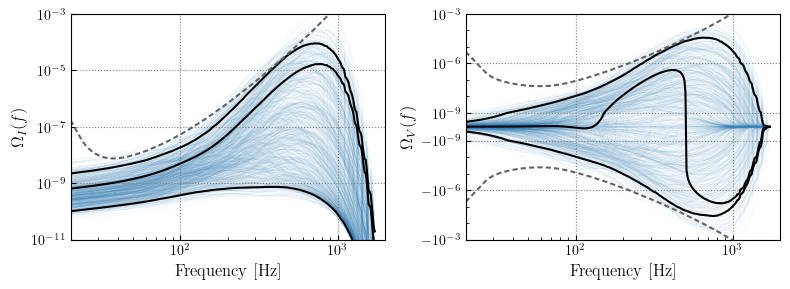

In [4]:
fig,axs = plt.subplots(1,2,figsize=(8,3))

###########
# Stokes I
###########

ax = axs[0]
ax.set_rasterization_zorder(1)

# Plot posterior samples
for i in np.random.choice(np.arange(Omg_I.shape[1]),size=1000):
    ax.plot(frequencies,Omg_I[:,i],color='#3182bd',lw=0.2,alpha=0.1,zorder=0)
  
# Plot means and credible bounds
ax.plot(frequencies,np.mean(Omg_I,axis=1),color='black')
ax.plot(frequencies,np.quantile(Omg_I,0.95,axis=1),color='black')
ax.plot(frequencies,np.quantile(Omg_I,0.05,axis=1),color='black')

# PI curves
ax.plot(PI_freqs,StokesI_PI,color='#636363',dashes=(2.5,1.5))

# Misc formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$\Omega_I(f)$')
ax.set_xlim(20,2000)
ax.set_ylim(1e-11,1e-3)

###########
# Stokes V
###########

ax = axs[1]
ax.set_rasterization_zorder(1)

# Posterior samples
for i in np.random.choice(np.arange(Omg_V.shape[1]),size=1000):
    ax.plot(frequencies,Omg_V[:,i],color='#3182bd',lw=0.2,alpha=0.1,zorder=0)
    
# Bounds and mean
ax.plot(frequencies,np.mean(Omg_V,axis=1),color='black')
ax.plot(frequencies,np.quantile(Omg_V,0.95,axis=1),color='black')
ax.plot(frequencies,np.quantile(Omg_V,0.05,axis=1),color='black')

# PI curve (note that we plot two-sided sensitivities since Stokes V can be negative)
ax.plot(PI_freqs,StokesV_PI,color='#636363',dashes=(2.5,1.5))
ax.plot(PI_freqs,-StokesV_PI,color='#636363',dashes=(2.5,1.5))

ax.set_xscale('log')
ax.set_yscale('symlog',linthresh=1e-9,linscale=0.75)
ax.set_xlim(20,2000)
ax.set_ylim(-1e-3,1e-3)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$\Omega_V(f)$')
ax.set_yticks([-1e-3,-1e-6,-1e-9,1e-9,1e-6,1e-3])

plt.tight_layout()
plt.savefig('figure_09.pdf',bbox_inches='tight',dpi=200)
plt.show()